<h1>Kapitel 13 Mer om Regressionsanalys</h1>

In [29]:
#importera paket och exempeldata 
import numpy as np
import pandas as pd
import scipy.stats as scs 

import matplotlib.pyplot as plt
import seaborn as sns

# import statsmodels.api as sm
from statsmodels.formula.api import ols

# importera palmer penguins
filepath = 'penguins.csv'
penguins = pd.read_csv(filepath)
penguins = penguins.dropna().reset_index() # Plocka bort rader som innehåller NaN

In [30]:
penguins = penguins.sample(30)
penguins.head()

,index,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
236,244,Gentoo,Biscoe,45.5,14.5,212.0,4750.0,female,2009
18,23,Adelie,Biscoe,38.2,18.1,185.0,3950.0,male,2007
173,180,Gentoo,Biscoe,48.2,14.3,210.0,4600.0,female,2007
278,289,Chinstrap,Dream,52.0,18.1,201.0,4050.0,male,2007
166,172,Gentoo,Biscoe,50.2,14.3,218.0,5700.0,male,2007


<h3>Korrelationstest med scipy.stats</h3>

In [31]:
r, p = scs.pearsonr(penguins['flipper_length_mm'], penguins['body_mass_g'])
r, p

(0.8191327651179623, 3.1291219809333925e-08)

<h3>Konfidensintervall och hypotestest för koefficienterna i regressionsmodellen</h3>

In [32]:
model = ols('flipper_length_mm ~ body_mass_g', data=penguins).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      flipper_length_mm   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     57.10
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           3.13e-08
Time:                        10:37:41   Log-Likelihood:                -100.94
No. Observations:                  30   AIC:                             205.9
Df Residuals:                      28   BIC:                             208.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     134.2816      8.522     15.757      

<h3>Prediktionsintervall in sample-prediktion</h3>

In [33]:
predictions = model.get_prediction(penguins['body_mass_g'])

frame=predictions.summary_frame(alpha=0.05)
ypred=frame['mean']

frame[['obs_ci_lower','obs_ci_upper']]

,obs_ci_lower,obs_ci_upper
0,194.355670,225.206865
1,181.978219,212.152841
2,192.093355,222.700778
3,183.567993,213.742000
4,208.116041,241.646371
5,205.294719,238.109823
6,182.774644,212.945882
7,184.358267,214.541194
8,177.950046,208.233678
9,176.317421,206.687368


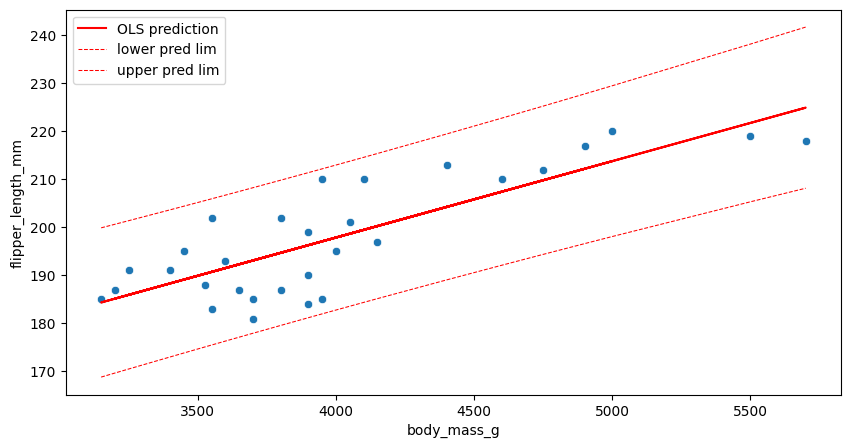

In [34]:
order = np.argsort(penguins['body_mass_g'])
xs = np.array(penguins['body_mass_g'])[order]
# ys = np.array(frame['obs_ci_lower'])[order]

fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(data=penguins, x='body_mass_g', y='flipper_length_mm')
ax.plot(penguins['body_mass_g'], ypred, "r", label="OLS prediction")

order = np.argsort(penguins['body_mass_g'])
x = np.array(penguins['body_mass_g'])[order]
lower = np.array(frame['obs_ci_lower'])[order]
upper = np.array(frame['obs_ci_upper'])[order]

ax.plot(xs, lower, 'r--', label="lower pred lim", linewidth=0.75)
ax.plot(xs, upper, 'r--', label="upper pred lim", linewidth=0.75)


ax.legend(loc="best")
plt.show()

<h3>Prediktionsintervall out of sample-prediktion</h3>

      body_mass_g
0        0.000000
1      151.057402
2      302.114804
3      453.172205
4      604.229607
..            ...
327  49395.770393
328  49546.827795
329  49697.885196
330  49848.942598
331  50000.000000

[332 rows x 1 columns]


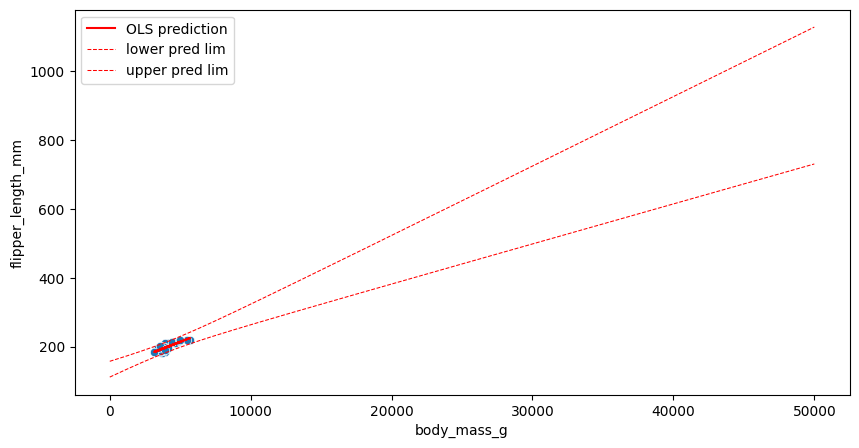

In [35]:
xs = pd.DataFrame(np.linspace(0,50000,332), columns=['body_mass_g'])
print(xs)

predictions = model.get_prediction(xs)
frame = predictions.summary_frame(alpha=0.05)
lower = frame['obs_ci_lower']
upper = frame['obs_ci_upper']

fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(data=penguins, x='body_mass_g', y='flipper_length_mm')
ax.plot(penguins['body_mass_g'], ypred, "r", label="OLS prediction")

ax.plot(xs, lower, 'r--', label="lower pred lim", linewidth=0.75)
ax.plot(xs, upper, 'r--', label="upper pred lim", linewidth=0.75)

ax.legend(loc="best")
plt.show()